# 1) Setup

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import networkx as nx
import re

import sklearn
from sklearn.cluster import AgglomerativeClustering     #cluster edges
from sklearn.metrics import silhouette_score            #score for clustering
from sklearn.metrics import classification_report       #score for classification
from sklearn.model_selection import GridSearchCV        #cross validate for KDE
from sklearn.model_selection import cross_validate      #cross validate for classification
from sklearn.neighbors import KernelDensity             #KDE for visualisation

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#visualise decision trees
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Pytorch libraries
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [2]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

#2) Bayesian optimisation of Lognormal model
from Gamma import *
from Lognormal import *
from Gaussian import *
from Gaussian_broadcast import *
from Normal_Gamma import *

from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_update import *
from Gaussian_ml import *              # for comparison

from select_data import *
from select_data_edge import *

from kde import *

#3) Clustering
from get_context import *
from get_adjacent import *
from get_coords import *

from distances_length import *
from distances_length_subset import *
from distances_connections import *
from distances_connections2 import *
from distances_ks import *
from distances_ks_threshold import *
from distances_square import *
from distances_angle_max import *
from distances_class import *

from underscore_prefix import *
from underscore_suffix import *

from integrate import *
from integrate_trapezium import *
from integrate_simpson import *
from integrate_pdf import *

from calc_length import *
from calc_angle import *

from optimum_clusters import *
from optimum_clusters_DBSCAN import *
from optimum_clusters_SC import *
from draw_clusters import *
from draw_clusters_tsc import *

from error_ks_2samples import *
from error_square_2samples import *
from compare_edges import *

#4) Classification
from get_length import *
from get_connections import *
from get_angle_max import *
from get_angle_sum import *

from dataloader6 import *
from dataloader_random import *
from classifier_pointtest import *
from classifier_featureimportance import *
from classifier_comparemethods import *
from classifier_trainonboth import *

#5) Evaluation
from get_lognorm_fit import *
from evaluate_maxedge import *
from evaluate_maxedge_fast import *
from evaluate_alledge import *
from evaluate_byclass import *

print("done")

done


In [3]:
#AAF
# retrieve data
df_aaf_y4 = pd.read_excel("data_aaf_y4.xlsx")
df_aaf_y4 = df_aaf_y4[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y3 = pd.read_excel("data_aaf_y3.xlsx")
df_aaf_y3 = df_aaf_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y2 = pd.read_excel("data_aaf_y2.xlsx")
df_aaf_y2 = df_aaf_y2[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_aaf_merge = pd.concat([df_aaf_y4, df_aaf_y3, df_aaf_y2])
df_aaf_merge = df_aaf_merge.sample(frac=1).reset_index(drop = True)

#TSC
# retrieve data
df_tsc_bob = pd.read_excel("data_tsc_bob.xlsx")
df_tsc_bob = df_tsc_bob[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_betty = pd.read_excel("data_tsc_betty.xlsx")
df_tsc_betty = df_tsc_betty[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_y3 = pd.read_excel("data_tsc_y3.xlsx")
df_tsc_y3 = df_tsc_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_tsc_merge = pd.concat([df_tsc_betty, df_tsc_bob, df_tsc_y3])
df_tsc_merge = df_tsc_merge.sample(frac=1).reset_index(drop = True)

#LABS
# retrieve data
df_labs = pd.read_excel("data_labs.xlsx")
df_labs = df_labs[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#randomise data
df_labs_merge = df_labs.sample(frac=1).reset_index(drop = True)

#BLENHEIM
# retrieve data
df_blenheim_random = pd.read_excel("data_blenheim_random.xlsx")
df_blenheim_random = df_blenheim_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_blenheim_targeted = pd.read_excel("data_blenheim_targeted.xlsx")
df_blenheim_targeted = df_blenheim_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_blenheim_merge = pd.concat([df_blenheim_random,df_blenheim_targeted])
df_blenheim_merge = df_blenheim_merge.sample(frac=1).reset_index(drop = True)

#WALMART
# retrieve data
df_walmart_random = pd.read_excel("data_walmart_random.xlsx")
df_walmart_random = df_walmart_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_walmart_targeted = pd.read_excel("data_walmart_targeted.xlsx")
df_walmart_targeted = df_walmart_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_walmart_merge = pd.concat([df_walmart_random,df_walmart_targeted])
df_walmart_merge = df_walmart_merge.sample(frac=1).reset_index(drop = True)

print("done")

done


# 2) KS Clustering

## 2a) AAF

In [4]:
#train map
threshold_matrix_aaf, threshold_edges_aaf, lone_edges_aaf = distances_ks_threshold(df_aaf_merge, metric = "difference", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_aaf), len(lone_edges_aaf))

0 edges: 0.04741668701171875 secs
10 edges: 16.955841541290283 secs
20 edges: 31.636805534362793 secs
30 edges: 43.946115493774414 secs
40 edges: 54.412336587905884 secs
50 edges: 64.15985679626465 secs
60 edges: 73.11574983596802 secs
70 edges: 81.49994015693665 secs
80 edges: 89.63116645812988 secs
90 edges: 97.45727586746216 secs
100 edges: 104.92589259147644 secs
110 edges: 111.9588234424591 secs
120 edges: 118.97194004058838 secs
130 edges: 125.77999329566956 secs
140 edges: 132.56284928321838 secs
150 edges: 139.24129676818848 secs
160 edges: 145.88202595710754 secs
170 edges: 152.4578559398651 secs
180 edges: 155.72691559791565 secs
190 edges: 155.73785948753357 secs
200 edges: 155.74984645843506 secs
Time taken: 155.76412963867188 secs
160 15


Optimum no. of clusters: 8
Max silhouette coeff: 0.347416142833845


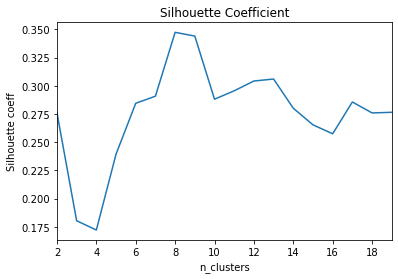

In [5]:
n_clusters, s_list = optimum_clusters(threshold_matrix_aaf, max_clusters = 20, method = "ss", linkage = "average")

In [6]:
clustering = AgglomerativeClustering(n_clusters=8, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_aaf )
print(labels)
threshold_clusters_aaf = pd.DataFrame(index = np.arange(len(threshold_edges_aaf)),columns = ["edge_id", "cluster_id"])
threshold_clusters_aaf["edge_id"] = threshold_edges_aaf
threshold_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[1 4 4 4 1 1 5 1 1 1 3 3 4 1 4 4 1 1 1 3 5 1 1 4 1 1 1 1 3 4 1 4 1 3 3 3 1
 3 0 1 0 1 1 0 1 0 3 3 5 1 1 5 1 4 3 3 0 3 2 1 1 1 1 1 2 1 3 0 2 1 1 0 1 3
 7 3 0 1 1 0 0 2 0 0 1 0 0 7 4 1 1 0 1 5 0 4 4 4 1 4 1 4 4 1 1 0 3 1 5 4 4
 5 3 1 1 1 0 0 5 6 3 5 3 5 4 4 5 1 1 0 1 0 4 4 4 1 0 5 4 4 0 1 3 3 1 3 1 4
 1 1 0 1 6 1 0 0 5 5 1 3]
8 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
CLuster 7 has colour code: purple
Edges without enough data are black


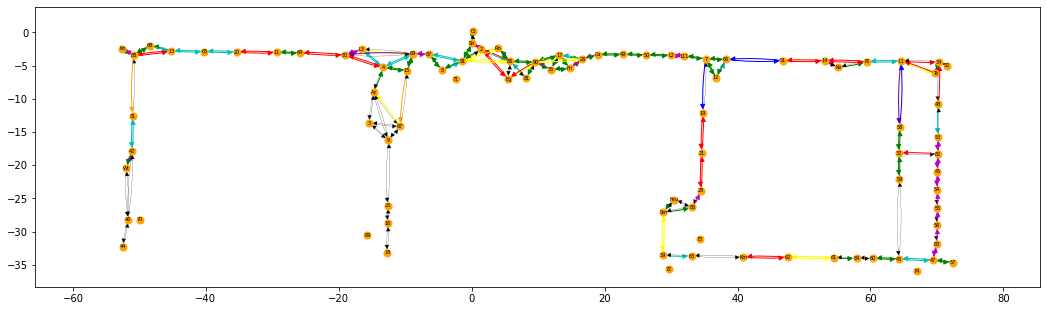

In [7]:
G = draw_clusters("aaf_map.yaml", threshold_clusters_aaf, size = 3, rotate = True)
plt.savefig("clusters_threshold_aaf.png", dpi = 1000, bbox_inches = "tight")

## 2b) TSC

In [8]:
#train map
threshold_matrix_tsc, threshold_edges_tsc, lone_edges_tsc = distances_ks_threshold(df_tsc_merge, metric = "difference", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_tsc), len(lone_edges_tsc))

0 edges: 0.04479551315307617 secs
10 edges: 7.324013948440552 secs
20 edges: 13.256169557571411 secs
30 edges: 18.85361385345459 secs
40 edges: 24.074095964431763 secs
50 edges: 28.958186149597168 secs
60 edges: 33.61441111564636 secs
70 edges: 38.21322202682495 secs
80 edges: 42.72528076171875 secs
90 edges: 47.19973850250244 secs
100 edges: 51.581414461135864 secs
110 edges: 55.91627049446106 secs
120 edges: 60.233376264572144 secs
130 edges: 64.4994649887085 secs
140 edges: 68.71271681785583 secs
150 edges: 72.86503624916077 secs
160 edges: 77.03601479530334 secs
170 edges: 81.12650418281555 secs
180 edges: 85.22485780715942 secs
190 edges: 89.29517221450806 secs
200 edges: 91.74116706848145 secs
210 edges: 91.74914622306824 secs
220 edges: 91.75616836547852 secs
230 edges: 91.76610279083252 secs
240 edges: 91.77308416366577 secs
Time taken: 91.78106260299683 secs
181 15


Optimum no. of clusters: 6
Max silhouette coeff: 0.25608673291961515


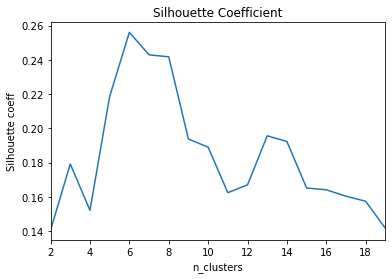

In [9]:
n_clusters, s_list = optimum_clusters(threshold_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [10]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_tsc )
print(labels)
threshold_clusters_tsc = pd.DataFrame(index = np.arange(len(threshold_edges_tsc)),columns = ["edge_id", "cluster_id"])
threshold_clusters_tsc["edge_id"] = threshold_edges_tsc
threshold_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 1 2 2 2 2 2 3 1 2 2 1 1 0 1 1 2 1 2 2 2 2 2 5 2 2 2 2 0 0 5 2 4 1 5 5 5
 2 5 2 1 2 2 5 5 2 2 2 0 5 0 1 0 1 0 5 5 5 5 2 0 5 4 2 0 0 2 4 5 1 1 2 1 0
 1 2 1 5 2 0 1 1 2 0 2 5 2 2 2 2 2 2 0 2 2 1 1 0 0 2 1 1 1 5 2 2 5 1 1 3 2
 2 5 1 1 1 2 1 1 1 2 0 0 5 5 1 1 1 2 2 2 1 2 1 2 5 1 2 2 5 2 2 1 5 1 5 2 1
 1 2 2 2 2 5 1 5 5 2 5 1 2 5 1 1 1 1 2 1 5 0 2 2 2 0 2 5 1 2 2 2 2]
6 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


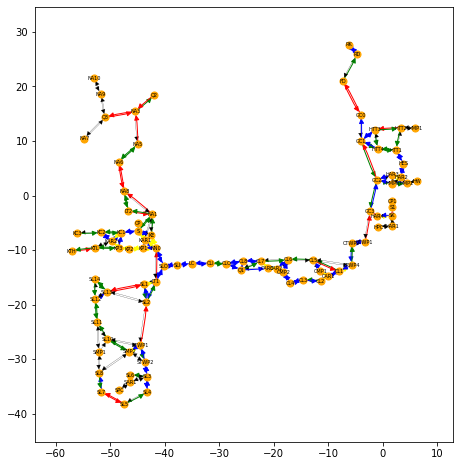

In [11]:
G = draw_clusters_tsc("tsc_map.yaml", threshold_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_threshold_tsc.png", dpi = 1000, bbox_inches = "tight")

## 2c) LABS

In [12]:
#train map
threshold_matrix_labs, threshold_edges_labs, lone_edges_labs = distances_ks_threshold(df_labs_merge, metric = "difference", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_labs), len(lone_edges_labs))

0 edges: 0.010478734970092773 secs
10 edges: 0.34937500953674316 secs
Time taken: 0.5689175128936768 secs
10 7


Optimum no. of clusters: 3
Max silhouette coeff: 0.5818118260076195


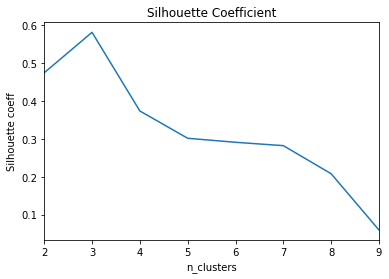

In [13]:
n_clusters, s_list = optimum_clusters(threshold_matrix_labs, max_clusters = 10, method = "ss", linkage = "average")

In [14]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_labs )
print(labels)
threshold_clusters_labs = pd.DataFrame(index = np.arange(len(threshold_edges_labs)),columns = ["edge_id", "cluster_id"])
threshold_clusters_labs["edge_id"] = threshold_edges_labs
threshold_clusters_labs["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 0 0 2 2 0 0 1 1 0]
3 clusters


no. of edges: 24
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
Edges without enough data are black


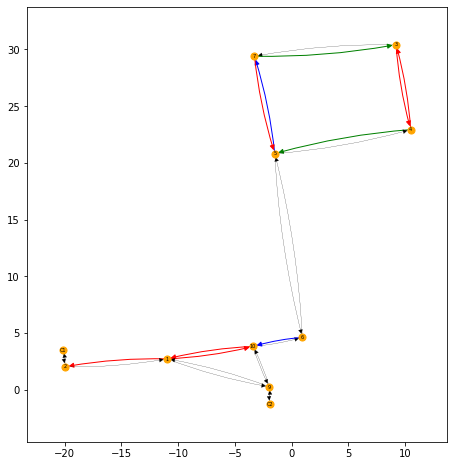

In [15]:
G = draw_clusters("labs_map.yaml", threshold_clusters_labs, size = 2, rotate = False)
plt.savefig("clusters_threshold_labs.png", dpi = 1000, bbox_inches = "tight")

## 2d) Walmart

In [16]:
#train map
threshold_matrix_walmart, threshold_edges_walmart, lone_edges_walmart = distances_ks_threshold(df_walmart_merge, metric = "operation_time", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_walmart), len(lone_edges_walmart))

0 edges: 0.045522212982177734 secs
10 edges: 6.392727613449097 secs
20 edges: 11.617591619491577 secs
30 edges: 16.235501050949097 secs
40 edges: 20.611862897872925 secs
50 edges: 24.80096983909607 secs
60 edges: 28.728941679000854 secs
70 edges: 32.537420988082886 secs
80 edges: 36.21231698989868 secs
90 edges: 39.834810972213745 secs
100 edges: 43.35259819030762 secs
110 edges: 46.81365942955017 secs
120 edges: 50.229381799697876 secs
130 edges: 53.63226819038391 secs
140 edges: 57.05442929267883 secs
150 edges: 60.41206431388855 secs
160 edges: 63.126559019088745 secs
170 edges: 63.1345374584198 secs
180 edges: 63.14151859283447 secs
190 edges: 63.15049457550049 secs
200 edges: 63.15747618675232 secs
210 edges: 63.165454626083374 secs
220 edges: 63.17397427558899 secs
230 edges: 63.18295073509216 secs
240 edges: 63.19092893600464 secs
250 edges: 63.19791030883789 secs
Time taken: 63.19990515708923 secs
157 1


Optimum no. of clusters: 6
Max silhouette coeff: 0.6910956596523739


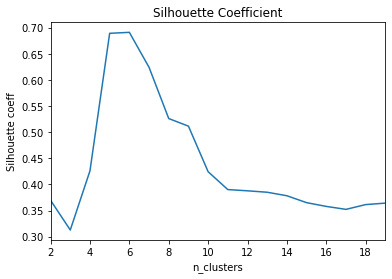

In [17]:
n_clusters, s_list = optimum_clusters(threshold_matrix_walmart, max_clusters = 20, method = "ss", linkage = "average")

In [18]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_walmart )
print(labels)
threshold_clusters_walmart = pd.DataFrame(index = np.arange(len(threshold_edges_walmart)),columns = ["edge_id", "cluster_id"])
threshold_clusters_walmart["edge_id"] = threshold_edges_walmart
threshold_clusters_walmart["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 5 0 5 0 5 0 0 5 0 1 0 1 0 3 5 5 5 5 0 0 1 0 0 0 0 0 1 1 5 0 0 3 1 5 5 0
 5 1 0 0 3 3 1 1 3 3 0 0 1 3 0 4 0 0 4 2 3 4 1 1 4 1 1 1 0 1 0 0 4 1 0 1 1
 2 3 3 2 2 1 0 1 1 1 1 0 4 1 1 4 0 1 4 1 1 1 1 4 1 1 3 1 1 1 1 0 1 1 4 1 1
 1 1 1 1 4 1 1 4 0 1 0 4 4 0 4 3 4 4 1 1 1 1 1 4 1 4 1 1 4 1 1 1 4 1 1 1 4
 1 1 1 1 1 4 1 1 1]
6 clusters


no. of edges: 256
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


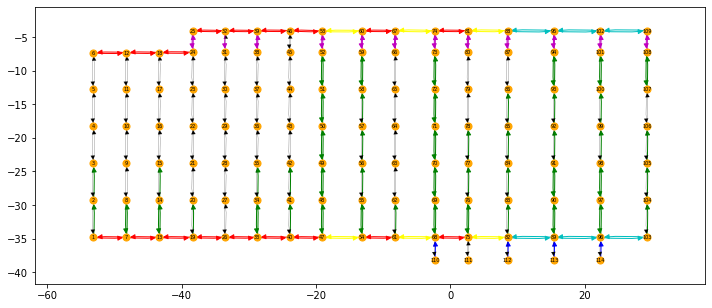

In [19]:
G = draw_clusters("walmart_map.yaml", threshold_clusters_walmart, size = 2, rotate = False)
plt.savefig("clusters_threshold_walmart.png", dpi = 1000, bbox_inches = "tight")

## 2e) Blenheim

In [20]:
#train map
threshold_matrix_blenheim, threshold_edges_blenheim, lone_edges_blenheim = distances_ks_threshold(df_blenheim_merge, metric = "operation_time", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_blenheim), len(lone_edges_blenheim))

0 edges: 0.010837793350219727 secs
10 edges: 1.1352875232696533 secs
Time taken: 1.8394572734832764 secs
18 0


Optimum no. of clusters: 2
Max silhouette coeff: 0.5950680085139111


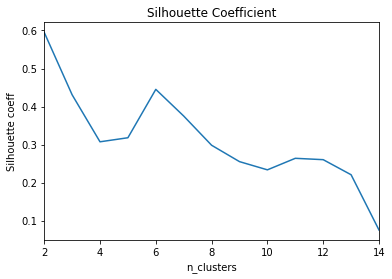

In [21]:
n_clusters, s_list = optimum_clusters(threshold_matrix_blenheim, max_clusters = 15, method = "ss", linkage = "average")

In [22]:
clustering = AgglomerativeClustering(n_clusters=1, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_blenheim )
print(labels)
threshold_clusters_blenheim = pd.DataFrame(index = np.arange(len(threshold_edges_blenheim)),columns = ["edge_id", "cluster_id"])
threshold_clusters_blenheim["edge_id"] = threshold_edges_blenheim
threshold_clusters_blenheim["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 clusters


no. of edges: 22
CLuster 0 has colour code: r
Edges without enough data are black


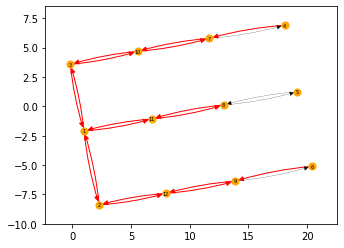

In [23]:
G = draw_clusters("blenheim_map.yaml", threshold_clusters_blenheim, size = 1, rotate = False)
plt.savefig("clusters_threshold_blenheim.png", dpi = 1000, bbox_inches = "tight")

## 2f) Spectral clustering (BAD)
- AAF
- TSC

### AAF

Optimum n_clusters: 5
Max silhouette coeff: 0.33979181394565555


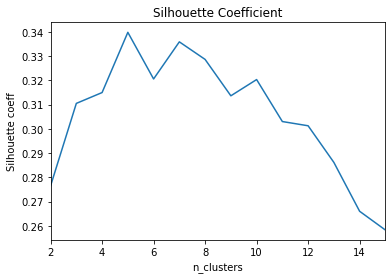

In [24]:
n_clusters, s_list = optimum_clusters_SC(threshold_matrix_aaf, max_clusters = 15, method = "ss")

In [25]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(affinity='precomputed', n_clusters = 7)
labels = clustering.fit_predict( 1 - np.array(threshold_matrix_aaf) )
print(labels)
threshold_clusters_aaf = pd.DataFrame(index = np.arange(len(threshold_edges_aaf)),columns = ["edge_id", "cluster_id"])
threshold_clusters_aaf["edge_id"] = threshold_edges_aaf
threshold_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[6 1 1 1 6 0 3 6 6 6 4 4 1 0 1 1 6 6 0 4 3 0 0 0 0 6 6 0 6 1 0 1 6 4 4 4 0
 4 4 0 5 6 0 5 0 5 4 4 3 6 0 3 6 1 4 4 5 4 2 6 0 0 6 0 2 6 4 5 2 6 6 5 6 6
 2 4 5 0 6 4 5 2 5 5 0 5 5 2 0 0 6 5 0 3 5 1 1 1 0 1 0 1 1 0 6 5 4 0 3 1 1
 3 4 0 6 0 5 5 3 2 4 3 4 3 1 1 3 0 6 5 6 5 1 1 1 6 5 3 1 0 5 6 4 6 0 4 6 1
 0 0 5 0 2 0 4 5 3 3 0 6]
7 clusters


### TSC

Optimum n_clusters: 4
Max silhouette coeff: 0.30662825535596655


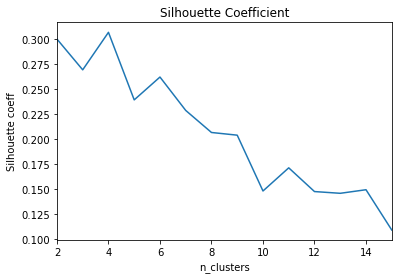

In [26]:
n_clusters, s_list = optimum_clusters_SC(threshold_matrix_tsc, max_clusters = 15, method = "ss")

In [27]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(affinity='precomputed', n_clusters = 4)
labels = clustering.fit_predict( 1-np.array(threshold_matrix_tsc) )
print(labels)
threshold_clusters_tsc = pd.DataFrame(index = np.arange(len(threshold_edges_tsc)),columns = ["edge_id", "cluster_id"])
threshold_clusters_tsc["edge_id"] = threshold_edges_tsc
threshold_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 0 1 1 1 1 1 3 0 1 1 0 0 3 0 0 1 0 1 1 1 1 1 1 1 1 1 1 3 3 2 0 2 0 2 2 2
 1 2 1 0 0 1 1 2 1 1 1 3 2 3 0 3 0 3 2 2 2 1 1 3 2 2 1 3 3 1 2 2 0 0 1 0 3
 0 1 0 2 1 3 0 0 1 3 1 2 1 1 1 1 1 1 3 1 1 0 0 3 0 1 0 0 0 2 1 1 2 0 0 3 1
 1 2 0 0 0 1 0 0 0 1 3 3 2 1 0 0 0 1 1 1 0 1 0 1 2 0 1 1 1 1 1 1 2 0 1 1 0
 3 1 1 1 1 1 0 2 2 1 2 0 1 2 0 0 0 0 1 0 1 3 1 1 1 3 1 2 0 1 1 1 1]
4 clusters


## 2g) DBSCAN (BAD)

## AAF

In [28]:
tune_dict,s_dict = optimum_clusters_DBSCAN(threshold_matrix_aaf,method="ss",min_samples = 1)

ValueError: Number of labels is 160. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.36, min_samples = 1, metric='precomputed')
labels = clustering.fit_predict( threshold_matrix_aaf )
print(labels)
threshold_clusters_aaf = pd.DataFrame(index = np.arange(len(threshold_edges_aaf)),columns = ["edge_id", "cluster_id"])
threshold_clusters_aaf["edge_id"] = threshold_edges_aaf
threshold_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

## TSC

In [ ]:
tune_dict,s_dict = optimum_clusters_DBSCAN(threshold_matrix_tsc,method="ss",min_samples = 1)

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.33, min_samples = 1, metric='precomputed')
labels = clustering.fit_predict( threshold_matrix_tsc )
print(labels)
threshold_clusters_tsc = pd.DataFrame(index = np.arange(len(threshold_edges_tsc)),columns = ["edge_id", "cluster_id"])
threshold_clusters_tsc["edge_id"] = threshold_edges_tsc
threshold_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

# 3) Binary Classifier

In [ ]:
#Load data
#training map
df_class_diff_aaf = dataloader6(threshold_clusters_aaf, filename = "aaf_map.yaml")
#testing map
df_class_diff_tsc = dataloader6(threshold_clusters_tsc, filename = "tsc_map.yaml")

#Additional training maps
#training map
df_class_diff_labs = dataloader6(threshold_clusters_labs, filename = "labs_map.yaml")
#training map
df_class_diff_walmart = dataloader6(threshold_clusters_walmart, filename = "walmart_map.yaml")
#training map
df_class_diff_blenheim = dataloader6(threshold_clusters_blenheim, filename = "blenheim_map.yaml")


In [ ]:
#df_class_diff_combined = pd.concat([df_class_diff_tsc,df_class_diff_labs,df_class_diff_walmart,df_class_diff_blenheim]).sample(frac=1).reset_index(drop=True)
df_class_diff_combined = pd.concat([df_class_diff_aaf,df_class_diff_labs]).sample(frac=1).reset_index(drop=True)
df_class_diff_combined.tail(2)

In [ ]:
cutoff = len(df_class_diff_combined)//5 * 4
df_train = df_class_diff_combined[:cutoff]
df_test = df_class_diff_combined[cutoff:]
print("done")

In [ ]:
#point test - can choose classifier
#from ["rf", "dt", "knn", "lr", "svm",  
#      "gb", "ab", "nb", "qda"]
classifier = "lr"
clf_tsc = classifier_pointtest(df_class_diff_aaf, df_class_diff_tsc,classifier = classifier,balanced = True)

In [ ]:
cutoff = len(df_class_diff_combined)//5 * 4
df_train = df_class_diff_combined[:cutoff]
df_test = df_class_diff_combined[cutoff:]

In [ ]:
accuracy = classifier_comparemethods(df_class_diff_aaf,df_class_diff_tsc,balanced = True, n_iter = 1, step_size = 1000)

# 4) Classifier to clusters

In [ ]:
dist_matrix_tsc, dist_edges_tsc = distances_class(df_class_diff_tsc,clf_tsc)

## 4a) HAC Clustering

In [ ]:
n_clusters, s_list = optimum_clusters(dist_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [ ]:
clustering = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( dist_matrix_tsc )
print(labels)
dist_clusters_tsc = pd.DataFrame(index = np.arange(len(dist_edges_tsc)),columns = ["edge_id", "cluster_id"])
dist_clusters_tsc["edge_id"] = dist_edges_tsc
dist_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

In [ ]:
G = draw_clusters_tsc("tsc_map.yaml", dist_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_dist_tsc.png", dpi = 1000, bbox_inches = "tight")

## 4b) Spectral Clustering (BAD)

In [ ]:
n_clusters, s_list = optimum_clusters_SC(dist_matrix_tsc, max_clusters = 15, method = "ss")

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(affinity='precomputed', n_clusters = 5)
labels = clustering.fit_predict( 1-np.array(dist_matrix_tsc) )
print(labels)
dist_clusters_tsc = pd.DataFrame(index = np.arange(len(dist_edges_tsc)),columns = ["edge_id", "cluster_id"])
dist_clusters_tsc["edge_id"] = dist_edges_tsc
dist_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

## 4c) DBSCAN Clustering (BAD)

In [ ]:
tune_dict,s_dict = optimum_clusters_DBSCAN(dist_matrix_tsc,method="ss",min_samples = 1)

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.08, min_samples = 1, metric='precomputed')
labels = clustering.fit_predict( dist_matrix_tsc )
print(labels)
dist_clusters_tsc = pd.DataFrame(index = np.arange(len(dist_edges_tsc)),columns = ["edge_id", "cluster_id"])
dist_clusters_tsc["edge_id"] = dist_edges_tsc
dist_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

# 5) Comparisons - Edge length clusters

In [ ]:
context_tsc = get_context("tsc_map.yaml",suppress_message = False)
length_matrix_tsc,length_edges_tsc = distances_length_subset(context_tsc,dist_edges_tsc)

## 5a) HAC clustering

In [ ]:
n_clusters, s_list = optimum_clusters(length_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [ ]:
clustering = AgglomerativeClustering(n_clusters=8, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( length_matrix_tsc )
print(labels)
length_clusters_tsc = pd.DataFrame(index = np.arange(len(length_edges_tsc)),columns = ["edge_id", "cluster_id"])
length_clusters_tsc["edge_id"] = length_edges_tsc
length_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

In [ ]:
G = draw_clusters_tsc("tsc_map.yaml", length_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_length_tsc.png", dpi = 1000, bbox_inches = "tight")

## 5b) Spectral Clustering (BAD)

In [ ]:
n_clusters, s_list = optimum_clusters_SC(length_matrix_tsc/max(max(length_matrix_tsc)), max_clusters = 10, method = "ss")

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(affinity='precomputed', n_clusters = 6)
labels = clustering.fit_predict( 1-np.array(length_matrix_tsc)/max(max(length_matrix_tsc)) )
print(labels)
length_clusters_tsc = pd.DataFrame(index = np.arange(len(length_edges_tsc)),columns = ["edge_id", "cluster_id"])
length_clusters_tsc["edge_id"] = length_edges_tsc
length_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

## 5c) DBSCAN Clustering (BAD)

In [ ]:
tune_dict,s_dict = optimum_clusters_DBSCAN(length_matrix_tsc,method="ss",min_samples = 1)

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.32, min_samples = 1, metric='precomputed')
labels = clustering.fit_predict( length_matrix_tsc )
print(labels)
length_clusters_tsc = pd.DataFrame(index = np.arange(len(length_edges_tsc)),columns = ["edge_id", "cluster_id"])
length_clusters_tsc["edge_id"] = length_edges_tsc
length_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

# 6) Evaluate

## 6a) All edges vs all other edges in cluster

In [ ]:
fit_tsc = get_lognorm_fit(df_tsc_merge,filename = "tsc_map.yaml",metric = "difference")
fit_tsc = fit_tsc.sort_values("n_obs", ascending = False).reset_index(drop = True)
fit_tsc.head(2)

In [ ]:
# binary classification clusters
ks_df = evaluate_alledge(df_tsc_merge, dist_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 0)
ks_df.head(10)

In [ ]:
# edge length clusters
ks_df = evaluate_alledge(df_tsc_merge, length_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 0)
ks_df.head(10)

In [ ]:
# ks clusters
ks_df = evaluate_alledge(df_tsc_merge, threshold_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 0)
ks_df.head(10)

## 6b) KS scores of class 0 & class 1
- use dataloader6
- & get_lognorm_fit

In [ ]:
binclass_classifier = dataloader6(dist_clusters_tsc, "tsc_map.yaml")
binclass_length = dataloader6(length_clusters_tsc, "tsc_map.yaml")
binclass_ks = dataloader6(threshold_clusters_tsc, "tsc_map.yaml")

In [ ]:
ks_mean0, ks_mean1 = evaluate_byclass(df_tsc_merge, binclass_classifier, fit_tsc, metric = "difference", n_fitted = 2)

In [ ]:
ks_mean0, ks_mean1 = evaluate_byclass(df_tsc_merge, binclass_length, fit_tsc, metric = "difference", n_fitted = 2)

In [ ]:
ks_mean0, ks_mean1 = evaluate_byclass(df_tsc_merge, binclass_ks, fit_tsc, metric = "difference", n_fitted = 2)